In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
train_data = pd.read_csv(r"train_data.csv")
test_data  = pd.read_csv(r"test_data.csv")
train_data.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [3]:
test_data.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.469986,1.000000,0.667595,29.58,Triassic,Normal polarity,False,0.583560,Limestone,Bottom,120.12,73.83,41072
1,0.619865,0.474208,1.218381,69.87,Cretaceous,Reversed polarity,True,0.942719,Shale,Middle,72.82,191.68,42085
2,0.767736,0.478731,0.119801,96.38,Cretaceous,Normal polarity,False,0.377531,Sandstone,Bottom,105.47,82.25,50436
3,0.275121,0.400594,0.634760,134.10,Triassic,Normal polarity,True,0.323820,Sandstone,Middle,94.99,47.99,25923
4,0.407470,0.039705,0.824597,124.10,Triassic,Normal polarity,False,1.219120,Shale,Middle,139.93,532.62,30272


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [5]:
train_data.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


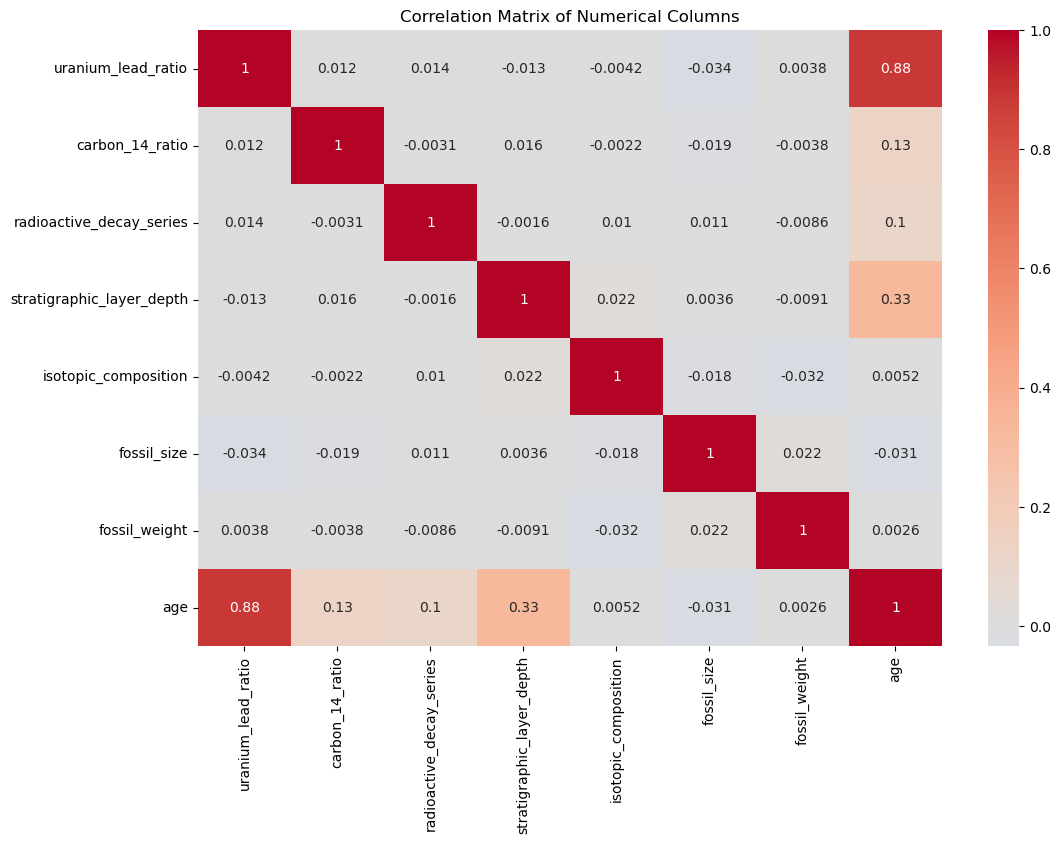

In [6]:
numerical_cols = train_data.select_dtypes(include=['number'])
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

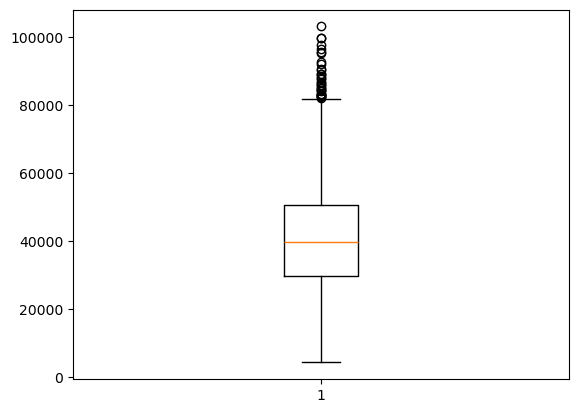

In [7]:
plt.boxplot(train_data["age"])
plt.show()

Outliers in Age :  46


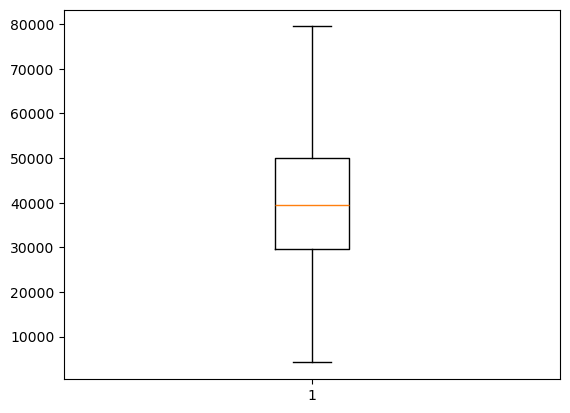

In [8]:
print(f"Outliers in Age : ", len(train_data[train_data["age"] > 80000]))

train_data = train_data[train_data["age"] < 80000]
plt.boxplot(train_data["age"])
plt.show()

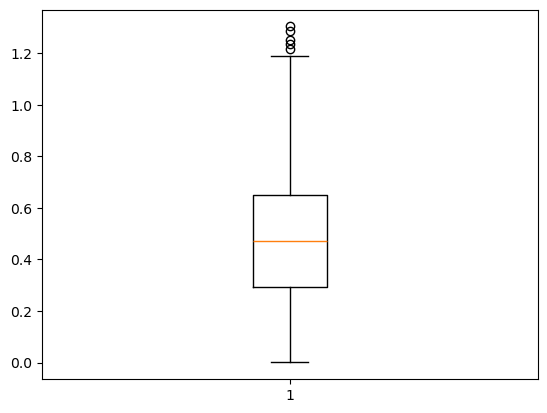

In [9]:
plt.boxplot(train_data["uranium_lead_ratio"])
plt.show()

Outliers in uranium_lead_ratio :  27


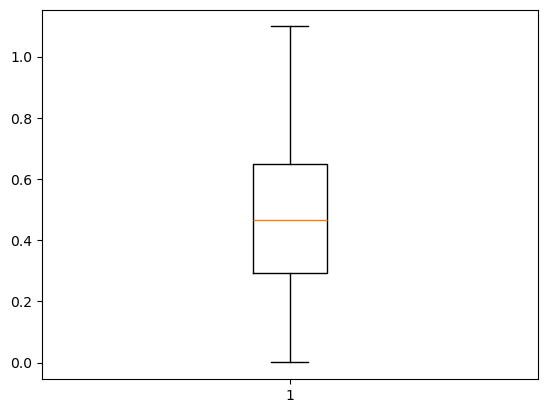

In [10]:
print(f"Outliers in uranium_lead_ratio : ", len(train_data[train_data["uranium_lead_ratio"] > 1.1]))

train_data = train_data[train_data["uranium_lead_ratio"] < 1.1]
plt.boxplot(train_data["uranium_lead_ratio"])
plt.show()

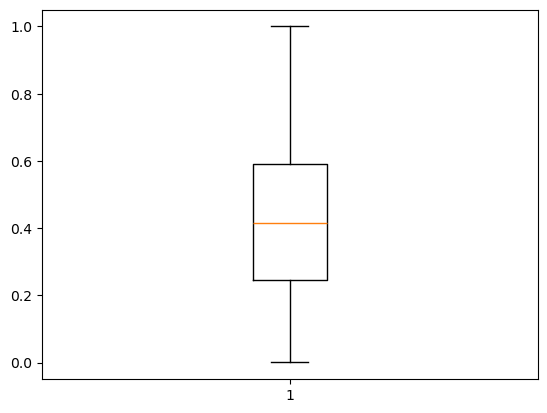

In [11]:
plt.boxplot(train_data["carbon_14_ratio"])
plt.show()

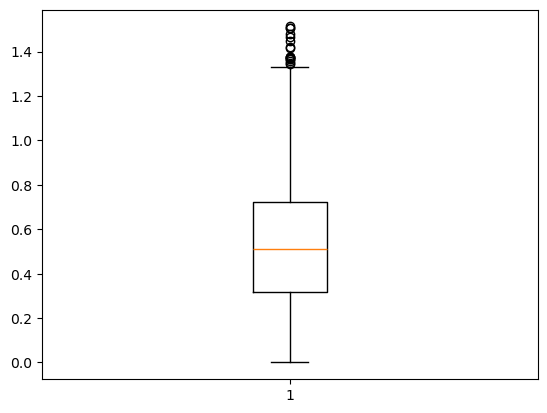

In [12]:
plt.boxplot(train_data["radioactive_decay_series"])
plt.show()

Outliers in radioactive_decay_series :  22


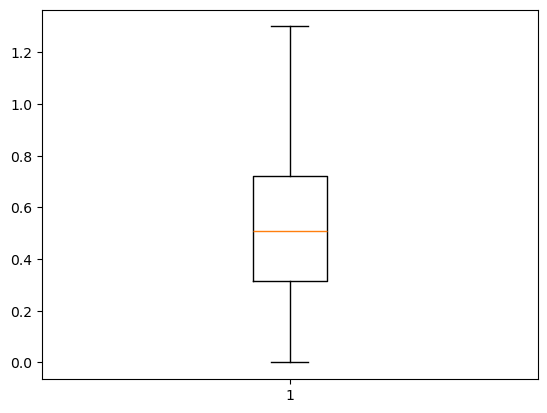

In [13]:
print(f"Outliers in radioactive_decay_series : ", len(train_data[train_data["radioactive_decay_series"] > 1.3]))

train_data = train_data[train_data["radioactive_decay_series"] < 1.3]
plt.boxplot(train_data["radioactive_decay_series"])
plt.show()

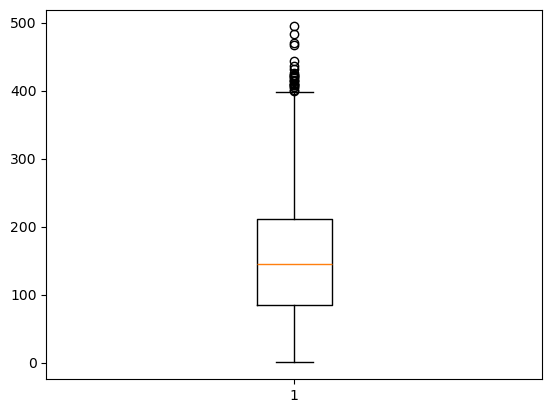

In [14]:
plt.boxplot(train_data["stratigraphic_layer_depth"])
plt.show()

Outliers in stratigraphic_layer_depth :  32


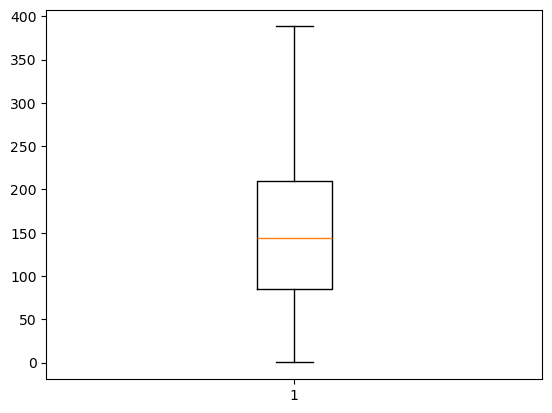

In [15]:
print(f"Outliers in stratigraphic_layer_depth : ", len(train_data[train_data["stratigraphic_layer_depth"] > 390]))

train_data = train_data[train_data["stratigraphic_layer_depth"] < 390]
plt.boxplot(train_data["stratigraphic_layer_depth"])
plt.show()

In [16]:
train_data.describe(include="O")

,geological_period,paleomagnetic_data,surrounding_rock_type,stratigraphic_position
count,4271,4271,4271,4271
unique,11,2,4,3
top,Cambrian,Normal polarity,Sandstone,Bottom
freq,848,3072,1454,2583


array([[<Axes: title={'center': 'uranium_lead_ratio'}>,
        <Axes: title={'center': 'carbon_14_ratio'}>,
        <Axes: title={'center': 'radioactive_decay_series'}>],
       [<Axes: title={'center': 'stratigraphic_layer_depth'}>,
        <Axes: title={'center': 'isotopic_composition'}>,
        <Axes: title={'center': 'fossil_size'}>],
       [<Axes: title={'center': 'fossil_weight'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

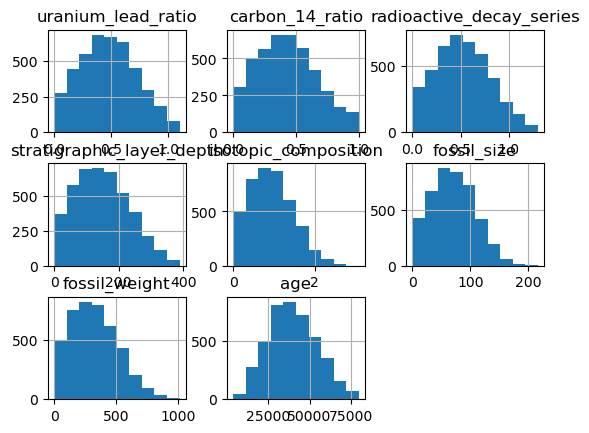

In [17]:
train_data.hist()

In [18]:
train_data["geological_period"].value_counts()

geological_period
Cambrian         848
Triassic         663
Cretaceous       588
Devonian         481
Jurassic         477
Paleogene        393
Permian          353
Neogene          304
Ordovician        97
Carboniferous     51
Silurian          16
Name: count, dtype: int64

In [19]:
# train_data["geological_period"].value_counts()
train_data.groupby(["geological_period"])["age"].mean().sort_values()

geological_period
Paleogene        37952.272265
Carboniferous    38049.588235
Neogene          38514.203947
Ordovician       38676.567010
Cretaceous       38707.950680
Jurassic         38970.754717
Devonian         39818.989605
Triassic         40422.634992
Permian          41113.937677
Cambrian         41490.091981
Silurian         42443.375000
Name: age, dtype: float64

In [20]:
# train_data["geological_period"].replace({"Paleogene":0, "Neogene":1, "Carboniferous":2, "Cretaceous":3, "Ordovician":4, "Jurassic":5, "Devonian":6, "Triassic":7, "Permian":8, "Cambrian":9, "Silurian":10}, inplace=True)
# test_data["geological_period"].replace({"Paleogene":0, "Neogene":1, "Carboniferous":2, "Cretaceous":3, "Ordovician":4, "Jurassic":5, "Devonian":6, "Triassic":7, "Permian":8, "Cambrian":9, "Silurian":10}, inplace=True)

In [21]:
train_data["paleomagnetic_data"].value_counts()

paleomagnetic_data
Normal polarity      3072
Reversed polarity    1199
Name: count, dtype: int64

In [22]:
train_data.groupby(["paleomagnetic_data"])["age"].mean().sort_values()

paleomagnetic_data
Normal polarity      39377.934570
Reversed polarity    40888.306922
Name: age, dtype: float64

In [23]:
# train_data["paleomagnetic_data"].replace({"Normal polarity":0, "Reversed polarity":1}, inplace=True)
# test_data["paleomagnetic_data"].replace({"Normal polarity":0, "Reversed polarity":1}, inplace=True)

In [24]:
train_data["surrounding_rock_type"].value_counts()

surrounding_rock_type
Sandstone       1454
Limestone       1135
Shale           1100
Conglomerate     582
Name: count, dtype: int64

In [25]:
train_data.groupby(["surrounding_rock_type"])["age"].mean().sort_values()

surrounding_rock_type
Shale           39293.628182
Conglomerate    39416.441581
Limestone       39921.432599
Sandstone       40247.530261
Name: age, dtype: float64

In [26]:
# train_data["surrounding_rock_type"].replace({"Conglomerate":0, "Shale":1, "Limestone":2, "Sandstone":3}, inplace=True)
# test_data["surrounding_rock_type"].replace({"Conglomerate":0, "Shale":1, "Limestone":2, "Sandstone":3}, inplace=True)

In [27]:
train_data["stratigraphic_position"].value_counts()

stratigraphic_position
Bottom    2583
Middle    1237
Top        451
Name: count, dtype: int64

In [28]:
train_data.groupby(["stratigraphic_position"])["age"].mean().sort_values()

stratigraphic_position
Middle    35845.187551
Top       36155.110865
Bottom    42333.582269
Name: age, dtype: float64

In [29]:
train_data["stratigraphic_position"].replace({"Middle":0, "Top":1, "Bottom":2}, inplace=True)
test_data["stratigraphic_position"].replace({"Middle":0, "Top":1, "Bottom":2}, inplace=True)

In [30]:
cols = ["uranium_lead_ratio", "carbon_14_ratio", "radioactive_decay_series", "stratigraphic_layer_depth", "stratigraphic_position", "age"] # "geological_period", "paleomagnetic_data", stratigraphic_position

In [31]:
for col in train_data.columns:
    if train_data[col].dtype == object and col in cols: # and col in cols
        train_data = pd.get_dummies(train_data, columns=[col])
        test_data  = pd.get_dummies(test_data, columns=[col])

In [32]:
train_data

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,0,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,1,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,2,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,2,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,1,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,0.563002,0.354462,0.194431,125.51,Jurassic,Reversed polarity,True,2.318179,Shale,2,142.02,350.98,44036
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,2,91.69,415.13,26606
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,2,68.97,121.10,44850
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,0,11.37,288.73,32186


In [33]:
y_train = train_data["age"]
X_train = train_data[cols].drop(["age"], axis=1)

y_test = test_data["age"]
X_test = test_data[cols].drop(["age"], axis=1)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

linearReg_model = LinearRegression()
linearReg_model.fit(X_train_scaled, y_train)

linearReg_y_pred = linearReg_model.predict(X_test_scaled)

linearReg_RMSE = np.sqrt(mean_squared_error(y_test, linearReg_y_pred))
linearReg_MAE = mean_absolute_error(y_test, linearReg_y_pred)

print("Linear Regression RMSE :", linearReg_RMSE)
print("Linear Regression MAE  :", linearReg_MAE, "\n")

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, linearReg_y_pred)):
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Linear Regression RMSE : 3284.293739801799
Linear Regression MAE  : 2451.157725523717 

Real value is 41072 | The predicted value is 38709
Real value is 42085 | The predicted value is 39815
Real value is 50436 | The predicted value is 50742
Real value is 25923 | The predicted value is 23063
Real value is 30272 | The predicted value is 27288
Real value is 41345 | The predicted value is 41180
Real value is 48312 | The predicted value is 41712
Real value is 35023 | The predicted value is 35329
Real value is 92537 | The predicted value is 77996
Real value is 65242 | The predicted value is 59988


In [36]:
from sklearn.tree import DecisionTreeRegressor

decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train_scaled, y_train)

decisionTree_y_pred = decisionTree_model.predict(X_test_scaled)

decisionTree_RMSE = np.sqrt(mean_squared_error(y_test, decisionTree_y_pred))
decisionTree_MAE = mean_absolute_error(y_test, decisionTree_y_pred)

print("Decision Tree RMSE :", decisionTree_RMSE)
print("Decision Tree MAE  :", decisionTree_MAE, "\n")

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, decisionTree_y_pred)):    
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Decision Tree RMSE : 4220.883029005359
Decision Tree MAE  : 3178.7536363636364 

Real value is 41072 | The predicted value is 40777
Real value is 42085 | The predicted value is 36198
Real value is 50436 | The predicted value is 46662
Real value is 25923 | The predicted value is 18472
Real value is 30272 | The predicted value is 30299
Real value is 41345 | The predicted value is 42575
Real value is 48312 | The predicted value is 47437
Real value is 35023 | The predicted value is 36120
Real value is 92537 | The predicted value is 78017
Real value is 65242 | The predicted value is 62925


In [37]:
from sklearn.ensemble import RandomForestRegressor

randomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest_model.fit(X_train_scaled, y_train)

randomForest_y_pred = randomForest_model.predict(X_test_scaled)

randomForest_RMSE = np.sqrt(mean_squared_error(y_test, randomForest_y_pred))
randomForest_MAE  = mean_absolute_error(y_test, randomForest_y_pred)

print("Random Forest RMSE :", randomForest_RMSE)
print("Random Forest MAE  :", randomForest_MAE)

for index, (real_value, predicted_value) in zip(range(1, 20), zip(y_test, randomForest_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Random Forest RMSE : 3509.4129284398837
Random Forest MAE  : 2516.5699181818177
Real value is 41072 | The predicted value is 37599
Real value is 42085 | The predicted value is 38255
Real value is 50436 | The predicted value is 51780
Real value is 25923 | The predicted value is 24339
Real value is 30272 | The predicted value is 30100
Real value is 41345 | The predicted value is 41459
Real value is 48312 | The predicted value is 44438
Real value is 35023 | The predicted value is 35943
Real value is 92537 | The predicted value is 76688
Real value is 65242 | The predicted value is 62093
Real value is 43958 | The predicted value is 40037
Real value is 47803 | The predicted value is 47760
Real value is 19698 | The predicted value is 21051
Real value is 18436 | The predicted value is 19202
Real value is 35529 | The predicted value is 37248
Real value is 22907 | The predicted value is 18563
Real value is 25465 | The predicted value is 24422
Real value is 46187 | The predicted value is 43136
Re